<a href="https://colab.research.google.com/github/GiSoPed/Abalone-Age-Linear-Regressor/blob/main/AbaloneAgeRegressionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abalone Age Linear Regression Project
Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.

Note: Age of Abalone = rings + 1.5

Nash,Warwick, Sellers,Tracy, Talbot,Simon, Cawthorn,Andrew, and Ford,Wes. (1995). Abalone. UCI Machine Learning Repository. https://doi.org/10.24432/C55C7W.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# let's us copy things
import copy
# it let's us plot certain things
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
cols = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects and Examples/abalone.data", names = cols)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# replace the categorical data with integers
cleanup = {'sex' :{'M':1, 'F':2, 'I':3}}
df = df.replace(cleanup)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


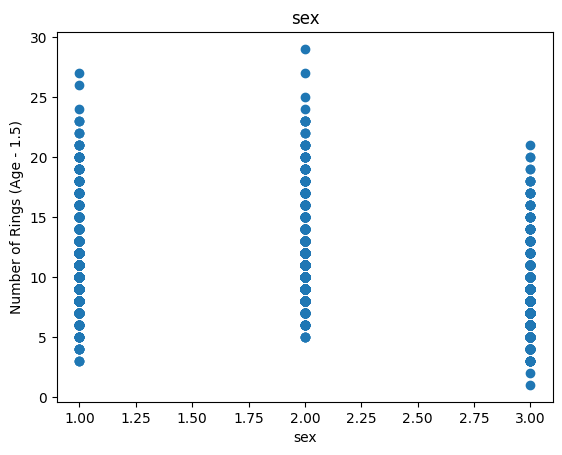

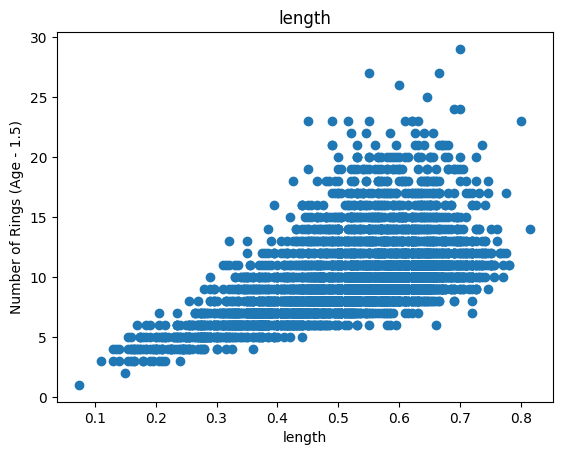

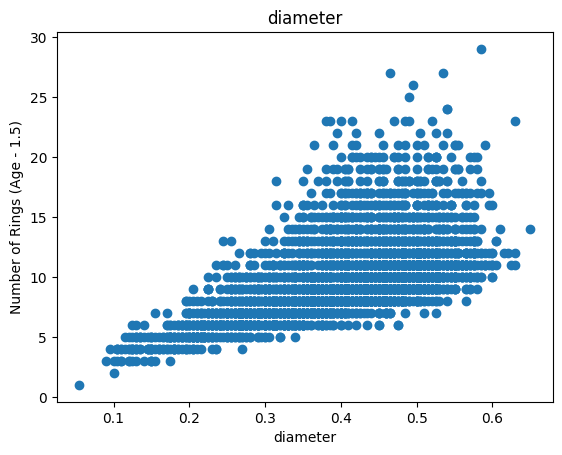

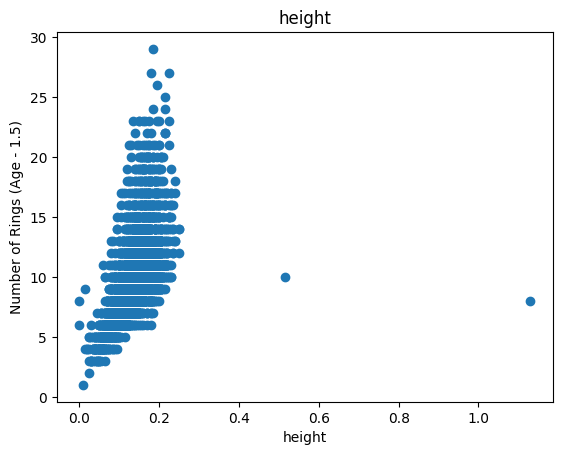

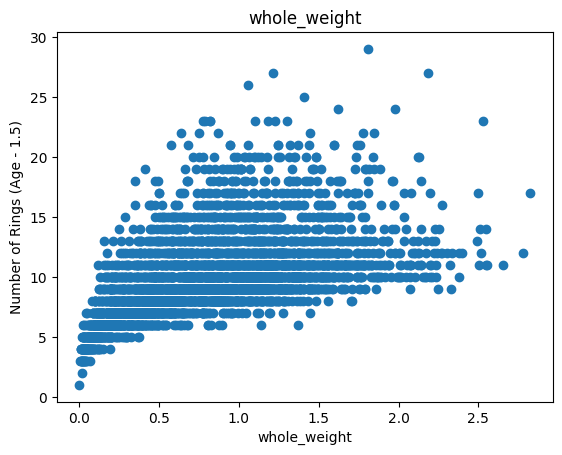

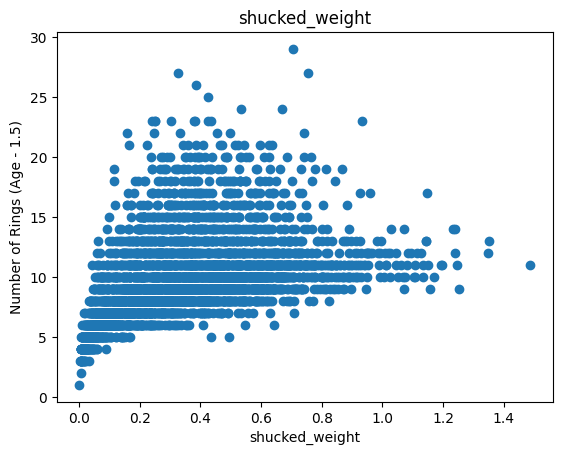

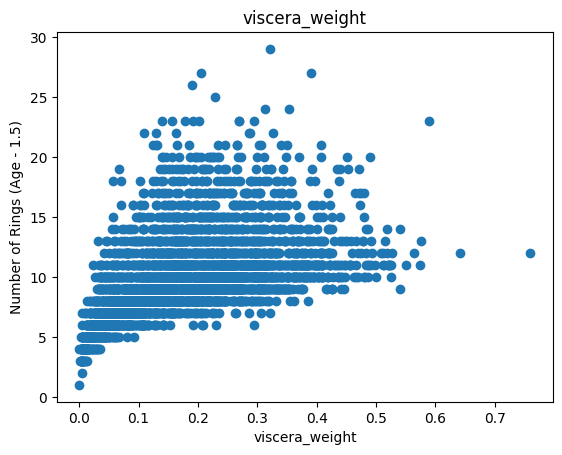

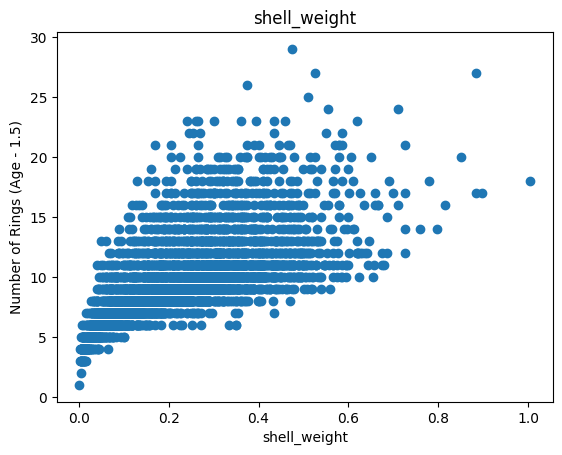

In [ ]:
for label in df.columns[:-1]:
  plt.scatter(df[label], df["rings"])
  plt.title(label)
  plt.ylabel("Number of Rings (Age - 1.5)")
  plt.xlabel(label)
  plt.show()

In [ ]:
# The sex of an abalone doesn't appear to make a difference in most of these physical attributes
# and they appear to have similar ring counts
df = df.drop(['sex'], axis=1)
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Train, Validate, Test

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

Simple Linear Regression

In [ ]:
_, X_train_len, y_train_len = get_xy(train, "rings", x_labels=["length"])
_, X_val_len, y_val_len = get_xy(val, "rings", x_labels=["length"])
_, X_test_len, y_test_len = get_xy(test, "rings", x_labels=["length"])

In [ ]:
len_reg = LinearRegression()
len_reg.fit(X_train_len, y_train_len)

LinearRegression()

In [ ]:
len_reg.score(X_test_len, y_test_len)

0.32269394309597954

<function matplotlib.pyplot.show(close=None, block=None)>

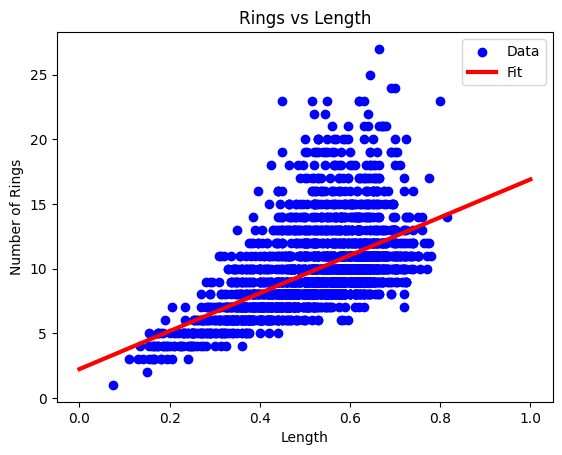

In [ ]:
plt.scatter(X_train_len, y_train_len, label='Data', color='blue')
x = tf.linspace(0, 1, 100)
plt.plot(x, len_reg.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Rings vs Length")
plt.ylabel("Number of Rings")
plt.xlabel("Length")
plt.show

Multiple Linear Regression

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train, y_train = get_xy(train, "rings", x_labels=df.columns[:-1])
_, X_val, y_val = get_xy(val, "rings", x_labels=df.columns[:-1])
_, X_test, y_test = get_xy(test, "rings", x_labels=df.columns[:-1])

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# has improved a lot
all_reg.score(X_test, y_test)

0.5228065895732736

In [ ]:
y_pred_lr = all_reg.predict(X_test)

Regression with a Neural Net

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
len_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
len_normalizer.adapt(X_train_len.reshape(-1))

In [ ]:
len_nn_model = tf.keras.Sequential([
    len_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
len_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = len_nn_model.fit(
    X_train_len.reshape(-1), y_train_len,
    verbose =0,
    epochs = 100,
    validation_data=(X_val_len, y_val_len)
)

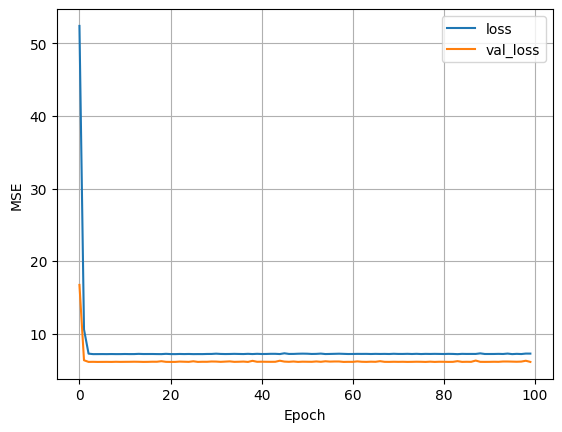

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

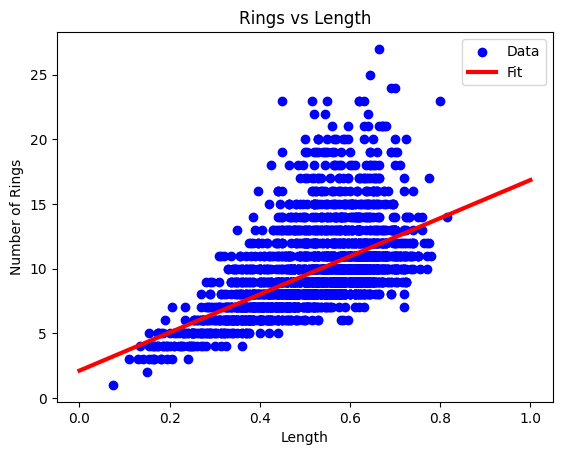

In [ ]:
plt.scatter(X_train_len, y_train_len, label='Data', color='blue')
x = tf.linspace(0, 1, 100)
plt.plot(x, len_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Rings vs Length")
plt.ylabel("Number of Rings")
plt.xlabel("Length")
plt.show

Real Neural Net

In [ ]:
len_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis= None)
len_normalizer.adapt(X_train_len.reshape(-1))
nn_model = tf.keras.Sequential([
    len_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_len, y_train_len,
    validation_data=(X_val_len, y_val_len),
    verbose =0, epochs =100
)

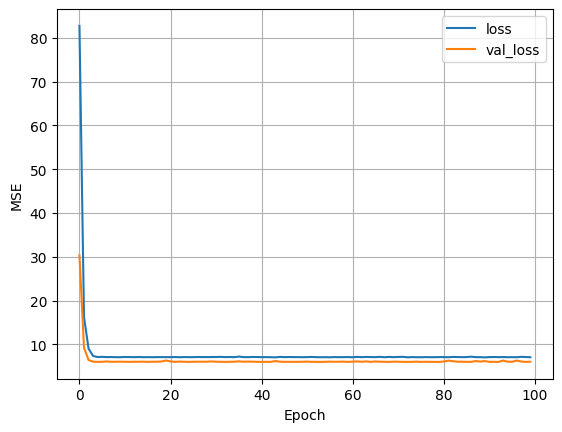

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

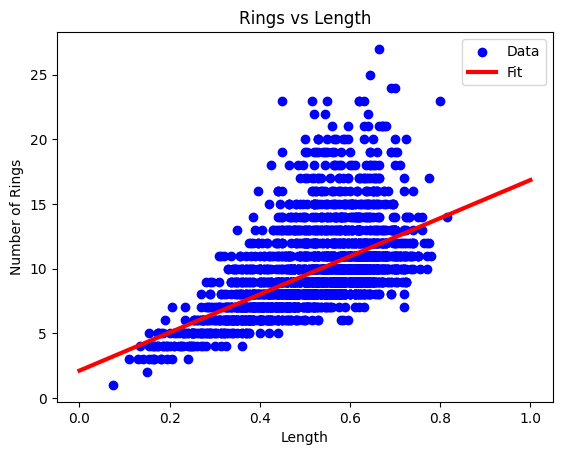

In [ ]:
plt.scatter(X_train_len, y_train_len, label='Data', color='blue')
x = tf.linspace(0, 1, 100)
plt.plot(x, len_nn_model.predict(np.array(x).reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.legend()
plt.title("Rings vs Length")
plt.ylabel("Number of Rings")
plt.xlabel("Length")
plt.show

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(7,), axis=-1)
all_normalizer.adapt(X_train)

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    verbose =0, epochs =100
)

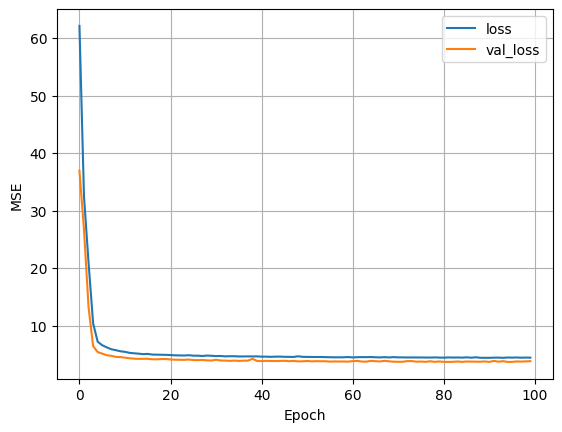

In [ ]:
plot_loss(history)

In [ ]:
#calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

27/27 [==============================] - 0s 2ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [ ]:
MSE(y_pred_lr, y_test)

4.7713870402499765

In [ ]:
MSE(y_pred_nn, y_test)

4.517543021125933

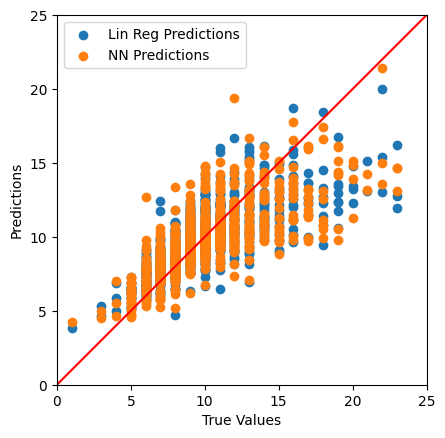

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_lr, label = 'Lin Reg Predictions')
plt.scatter(y_test, y_pred_nn, label = 'NN Predictions')
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c='red')